In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import Normalizer, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
macro = pd.read_csv("macro.csv", header=0)
macro.head()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.905,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.836,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN


In [4]:
macro["timestamp"].nunique()

2484

In [5]:
macro["timestamp"]= pd.to_datetime(macro["timestamp"])


In [6]:
macro.describe()

,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,eurrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
count,2484.000000,2394.000000,2394.000000,2453.000000,2453.000000,2119.000000,2453.000000,2394.000000,2481.000000,2481.000000,...,730.000000,2191.000000,1461.00000,2191.000000,1461.000000,1826.000000,1461.00000,1461.000000,1826.000000,1826.000000
mean,86.467157,16993.230075,1.523726,407.808398,480.216347,110.122308,15.344006,16.846742,40.732406,50.444801,...,480.500000,8691.922410,580.51540,0.443398,1245.543463,349902.577766,25.06859,67.800034,36282.434830,230615.059255
std,27.528709,3187.074480,2.875659,65.895969,70.286366,14.818429,3.878104,16.988727,15.006583,13.905912,...,209.643641,1668.967502,37.98811,0.016061,162.526951,72146.453110,2.44944,5.168602,10761.669111,2944.879242
min,29.112500,9995.800000,-4.500000,315.100000,337.200000,86.721000,5.823000,-4.100000,27.276300,37.445400,...,271.000000,6221.000000,527.00000,0.410000,993.000000,269768.000000,22.37000,63.030000,22825.000000,226047.300000
25%,61.283300,14925.000000,0.400000,354.000000,438.400000,100.000000,12.785000,7.200000,30.508800,40.242600,...,271.000000,6943.000000,565.00000,0.439390,1240.000000,288177.000000,23.01000,64.120000,23587.000000,229294.800000
50%,101.416500,17442.100000,1.300000,393.000000,473.500000,108.299000,16.041000,10.500000,32.316500,42.862200,...,480.500000,8522.000000,603.00000,0.450700,1309.000000,329348.000000,23.01000,67.850000,42551.000000,230310.000000
75%,109.310000,19284.100000,4.100000,469.400000,520.700000,123.661000,18.076000,21.500000,53.752300,61.323700,...,690.000000,10311.000000,603.00000,0.453560,1309.000000,398451.000000,26.70000,67.850000,46080.000000,232840.200000
max,122.520000,22016.100000,5.200000,531.000000,606.100000,133.160000,21.939000,75.800000,82.276400,90.881500,...,690.000000,10805.000000,627.00000,0.458880,1440.000000,463938.000000,28.20000,76.200000,46352.000000,234576.900000


In [7]:
macro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 100 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   timestamp                                   2484 non-null   datetime64[ns]
 1   oil_urals                                   2484 non-null   float64       
 2   gdp_quart                                   2394 non-null   float64       
 3   gdp_quart_growth                            2394 non-null   float64       
 4   cpi                                         2453 non-null   float64       
 5   ppi                                         2453 non-null   float64       
 6   gdp_deflator                                2119 non-null   float64       
 7   balance_trade                               2453 non-null   float64       
 8   balance_trade_growth                        2394 non-null   float64       
 9   usdrub 

In [8]:
train = pd.read_csv("train.csv", header=0)
train

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


In [12]:
train["timestamp"].nunique()

1161

In [13]:
train["timestamp"] = pd.to_datetime(train["timestamp"])

In [14]:
train.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,30471.000000,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,15237.917397,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,...,32.058318,10.783860,1.771783,15.045552,30.251518,0.442421,8.648814,52.796593,5.987070,7.123035e+06
std,8796.501536,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,...,73.465611,28.385679,5.418807,29.118668,47.347938,0.609269,20.580741,46.292660,4.889219,4.780111e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,7620.500000,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,...,2.000000,1.000000,0.000000,2.000000,9.000000,0.000000,0.000000,11.000000,1.000000,4.740002e+06
50%,15238.000000,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,...,8.000000,2.000000,0.000000,7.000000,16.000000,0.000000,2.000000,48.000000,5.000000,6.274411e+06
75%,22855.500000,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,...,21.000000,5.000000,1.000000,12.000000,28.000000,1.000000,7.000000,76.000000,10.000000,8.300000e+06
max,30473.000000,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,...,377.000000,147.000000,30.000000,151.000000,250.000000,2.000000,106.000000,218.000000,21.000000,1.111111e+08


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: datetime64[ns](1), float64(119), int64(157), object(15)
memory usage: 67.9+ MB


In [16]:
# выделяем возможные значимые  поля из train

In [17]:
train1 = train[["timestamp","full_sq","life_sq","floor","max_floor","material","build_year", \
                "num_room","kitch_sq","state","product_type","sub_area", "green_zone_km","full_all",\
                "male_f","female_f","young_all","young_male","young_female","work_all","work_male",\
                "work_female","ekder_all","ekder_male","ekder_female",\
                "office_count_500","office_count_1000","office_count_1500","office_count_2000","office_count_3000","office_count_5000",\
                "trc_count_500","trc_count_1000","trc_count_1500","trc_count_2000","trc_count_3000","trc_count_5000",\
                "cafe_count_500","cafe_count_1000","cafe_count_1500","cafe_count_2000","cafe_count_3000","cafe_count_5000",\
                "prom_part_500","prom_part_1000","prom_part_1500","prom_part_2000","prom_part_3000", "prom_part_5000",\
                "green_zone_km","metro_km_avto","metro_km_walk","mkad_km","ttk_km","sadovoe_km","bulvar_ring_km","kremlin_km",\
                "zd_vokzaly_avto_km","oil_chemistry_km","ts_km","price_doc"]]
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 61 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   timestamp           30471 non-null  datetime64[ns]
 1   full_sq             30471 non-null  int64         
 2   life_sq             24088 non-null  float64       
 3   floor               30304 non-null  float64       
 4   max_floor           20899 non-null  float64       
 5   material            20899 non-null  float64       
 6   build_year          16866 non-null  float64       
 7   num_room            20899 non-null  float64       
 8   kitch_sq            20899 non-null  float64       
 9   state               16912 non-null  float64       
 10  product_type        30471 non-null  object        
 11  sub_area            30471 non-null  object        
 12  green_zone_km       30471 non-null  float64       
 13  full_all            30471 non-null  int64     

In [18]:
# выделяем возможные значимые  поля из macro

In [19]:
macro1 = macro[["timestamp","gdp_quart","gdp_quart_growth","cpi","ppi","usdrub","eurrub","rts","micex",\
           "mortgage_value","mortgage_growth","mortgage_rate","grp","pop_migration","salary","childbirth","mortality",\
          "water_pipes_share","baths_share","sewerage_share","gas_share","hot_water_share","electric_stove_share",\
           "heating_share","old_house_share","average_life_exp", "modern_education_share","old_education_build_share",\
          "provision_doctors","apartment_fund_sqm"]]
macro1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   timestamp                  2484 non-null   datetime64[ns]
 1   gdp_quart                  2394 non-null   float64       
 2   gdp_quart_growth           2394 non-null   float64       
 3   cpi                        2453 non-null   float64       
 4   ppi                        2453 non-null   float64       
 5   usdrub                     2481 non-null   float64       
 6   eurrub                     2481 non-null   float64       
 7   rts                        2474 non-null   float64       
 8   micex                      2474 non-null   float64       
 9   mortgage_value             2484 non-null   int64         
 10  mortgage_growth            2119 non-null   float64       
 11  mortgage_rate              2484 non-null   float64       
 12  grp   

In [20]:
# Соединяем таблицы

In [21]:
df7 = train1.merge(macro1,on = "timestamp", how ="left")
df7

,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,modern_education_share,old_education_build_share,provision_doctors,apartment_fund_sqm
0,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,43.9,95.7,55.3,99.9,0.3,75.79,NaN,NaN,65.9,230310.0
1,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,43.9,95.7,55.3,99.9,0.3,75.79,NaN,NaN,65.9,230310.0
2,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,43.9,95.7,55.3,99.9,0.3,75.79,NaN,NaN,65.9,230310.0
3,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,...,43.9,95.7,55.3,99.9,0.3,75.79,NaN,NaN,65.9,230310.0
4,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,43.9,95.7,55.3,99.9,0.3,75.79,NaN,NaN,65.9,230310.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,...,NaN,NaN,NaN,NaN,NaN,76.77,"95,4918","8,2517",NaN,234576.9
30467,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,...,NaN,NaN,NaN,NaN,NaN,76.77,"95,4918","8,2517",NaN,234576.9
30468,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,76.77,"95,4918","8,2517",NaN,234576.9
30469,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,2.0,...,NaN,NaN,NaN,NaN,NaN,76.77,"95,4918","8,2517",NaN,234576.9


In [22]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30471 entries, 0 to 30470
Data columns (total 90 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   timestamp                  30471 non-null  datetime64[ns]
 1   full_sq                    30471 non-null  int64         
 2   life_sq                    24088 non-null  float64       
 3   floor                      30304 non-null  float64       
 4   max_floor                  20899 non-null  float64       
 5   material                   20899 non-null  float64       
 6   build_year                 16866 non-null  float64       
 7   num_room                   20899 non-null  float64       
 8   kitch_sq                   20899 non-null  float64       
 9   state                      16912 non-null  float64       
 10  product_type               30471 non-null  object        
 11  sub_area                   30471 non-null  object        
 12  gree

In [23]:
df7.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,green_zone_km,...,baths_share,sewerage_share,gas_share,hot_water_share,electric_stove_share,heating_share,old_house_share,average_life_exp,provision_doctors,apartment_fund_sqm
count,30471.000000,24088.000000,30304.000000,20899.000000,20899.000000,1.686600e+04,20899.000000,20899.000000,16912.000000,30471.000000,...,27232.000000,27232.000000,27232.000000,27232.000000,27232.000000,27232.000000,27232.000000,30471.000000,27232.000000,30471.000000
mean,54.214269,34.403271,7.670803,12.558974,1.827121,3.068057e+03,1.909804,6.399301,2.107025,0.300511,...,98.633182,98.091646,43.546636,94.356481,54.802225,99.316591,0.397235,76.446097,63.272187,229594.127331
std,38.031487,52.285733,5.319989,6.756550,1.481154,1.543878e+05,0.851805,28.265979,0.880148,0.298402,...,0.196770,0.242560,0.298697,0.229750,0.447910,0.098385,0.016397,0.362479,2.300220,2767.547945
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,...,98.600000,98.000000,43.300000,94.300000,54.100000,99.300000,0.300000,75.740000,61.000000,226047.300000
25%,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,1.000000,1.000000,0.100951,...,98.600000,98.000000,43.300000,94.300000,54.500000,99.300000,0.400000,76.370000,61.000000,226047.300000
50%,49.000000,30.000000,6.500000,12.000000,1.000000,1.979000e+03,2.000000,6.000000,2.000000,0.214336,...,98.600000,98.100000,43.300000,94.300000,55.200000,99.300000,0.400000,76.700000,61.000000,229294.800000
75%,63.000000,43.000000,11.000000,17.000000,2.000000,2.005000e+03,2.000000,9.000000,3.000000,0.415498,...,98.600000,98.100000,43.600000,94.300000,55.200000,99.300000,0.400000,76.700000,65.200000,232840.200000
max,5326.000000,7478.000000,77.000000,117.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,1.982448,...,99.800000,99.500000,44.100000,95.700000,55.300000,99.900000,0.400000,76.770000,66.100000,234576.900000


In [24]:
#Приводим все значения к числовоым
df=df7.loc[df7["price_doc"]>0]

In [25]:
df["product_type"].describe()

count          30471
unique             2
top       Investment
freq           19448
Name: product_type, dtype: object

In [26]:
df["product_type"]

0           Investment
1           Investment
2           Investment
3           Investment
4           Investment
             ...      
30466       Investment
30467       Investment
30468    OwnerOccupier
30469       Investment
30470       Investment
Name: product_type, Length: 30471, dtype: object

In [27]:
df["product_type"] = df["product_type"].apply(lambda x : 1 if x =="Investment" else 0)
df["product_type"]

0        1
1        1
2        1
3        1
4        1
        ..
30466    1
30467    1
30468    0
30469    1
30470    1
Name: product_type, Length: 30471, dtype: int64

In [28]:
df["month"] = df["timestamp"].dt.month
df["month"].describe()

count    30471.000000
mean         6.749237
std          3.518748
min          1.000000
25%          4.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month, dtype: float64

In [29]:
df.drop('timestamp',  axis = 'columns', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30471 entries, 0 to 30470
Data columns (total 90 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   full_sq                    30471 non-null  int64  
 1   life_sq                    24088 non-null  float64
 2   floor                      30304 non-null  float64
 3   max_floor                  20899 non-null  float64
 4   material                   20899 non-null  float64
 5   build_year                 16866 non-null  float64
 6   num_room                   20899 non-null  float64
 7   kitch_sq                   20899 non-null  float64
 8   state                      16912 non-null  float64
 9   product_type               30471 non-null  int64  
 10  sub_area                   30471 non-null  object 
 11  green_zone_km              30471 non-null  float64
 12  full_all                   30471 non-null  int64  
 13  male_f                     30471 non-null  int

In [30]:
df["sub_area"].describe()

count                   30471
unique                    146
top       Poselenie Sosenskoe
freq                     1776
Name: sub_area, dtype: object

In [31]:
labelEncoder = LabelEncoder()

df["sub_area"] = labelEncoder.fit_transform(df["sub_area"])
df["sub_area"].describe()

count    30471.000000
mean        76.488300
std         39.254685
min          0.000000
25%         44.000000
50%         77.000000
75%        105.000000
max        145.000000
Name: sub_area, dtype: float64

In [32]:
df["modern_education_share"].describe()

count     24879
unique        3
top       93,08
freq      13662
Name: modern_education_share, dtype: object

In [33]:
df["modern_education_share"] = labelEncoder.fit_transform(df["modern_education_share"])
df["modern_education_share"].describe()

count    30471.000000
mean         1.211513
std          1.028345
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: modern_education_share, dtype: float64

In [34]:
df["old_education_build_share"].describe()

count     24879
unique        3
top       25,47
freq      13662
Name: old_education_build_share, dtype: object

In [35]:
df["old_education_build_share"] = labelEncoder.fit_transform(df["old_education_build_share"])
df["old_education_build_share"].describe()

count    30471.000000
mean         1.211513
std          1.028345
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: old_education_build_share, dtype: float64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30471 entries, 0 to 30470
Data columns (total 90 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   full_sq                    30471 non-null  int64  
 1   life_sq                    24088 non-null  float64
 2   floor                      30304 non-null  float64
 3   max_floor                  20899 non-null  float64
 4   material                   20899 non-null  float64
 5   build_year                 16866 non-null  float64
 6   num_room                   20899 non-null  float64
 7   kitch_sq                   20899 non-null  float64
 8   state                      16912 non-null  float64
 9   product_type               30471 non-null  int64  
 10  sub_area                   30471 non-null  int64  
 11  green_zone_km              30471 non-null  float64
 12  full_all                   30471 non-null  int64  
 13  male_f                     30471 non-null  int

In [37]:
# для наглядности проверям как коррелируеются признаки с искомой price_doc в несколько итераций 

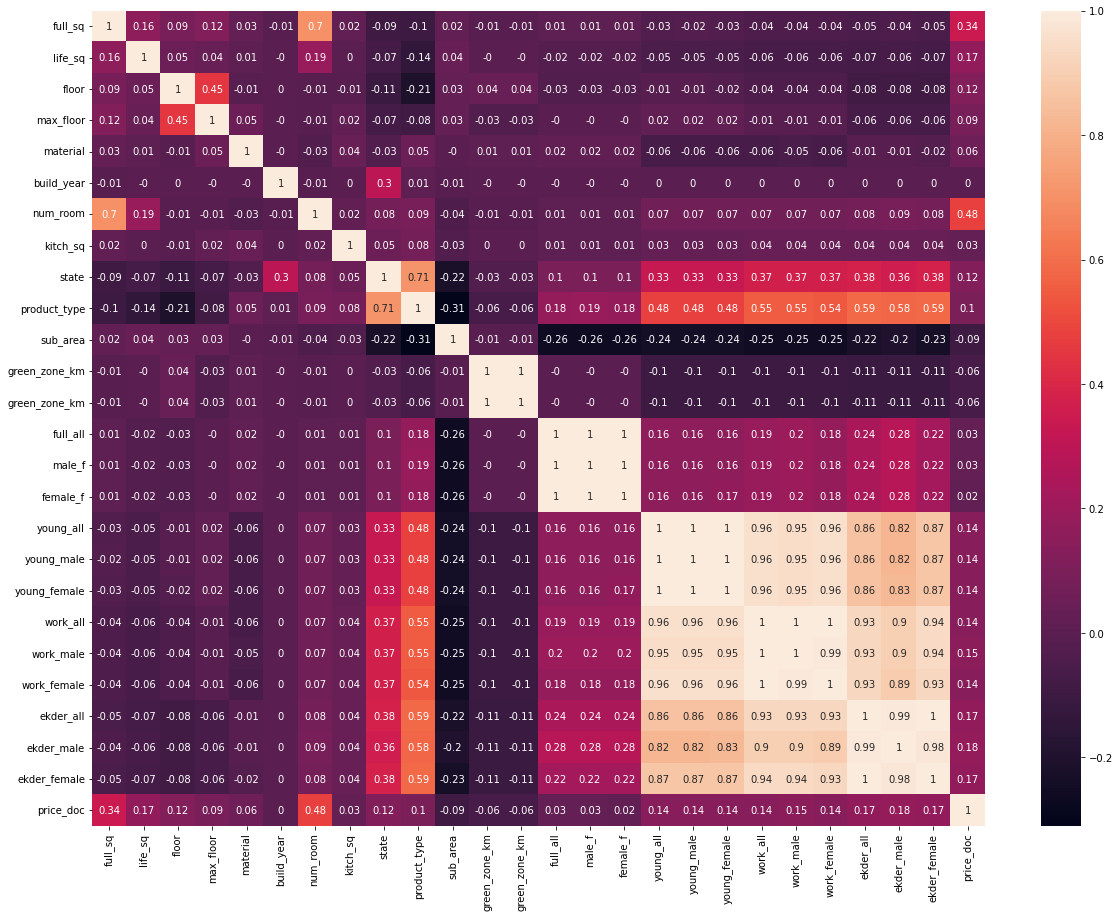

In [38]:
df1= df[["full_sq","life_sq","floor","max_floor","material","build_year", \
                "num_room","kitch_sq","state","product_type","sub_area", "green_zone_km","full_all",\
                "male_f","female_f","young_all","young_male","young_female","work_all","work_male",\
                "work_female","ekder_all","ekder_male","ekder_female","price_doc"]]
x_corr = df1.copy()
correlation_matrix = x_corr.corr().round(2)
plt.subplots(figsize=(20,15))
sns.heatmap(data=correlation_matrix, annot=True)

In [39]:
# из предыдущих столбцов выбираем наиболее коррелируемые к искомой "full_sq","life_sq","num_room"

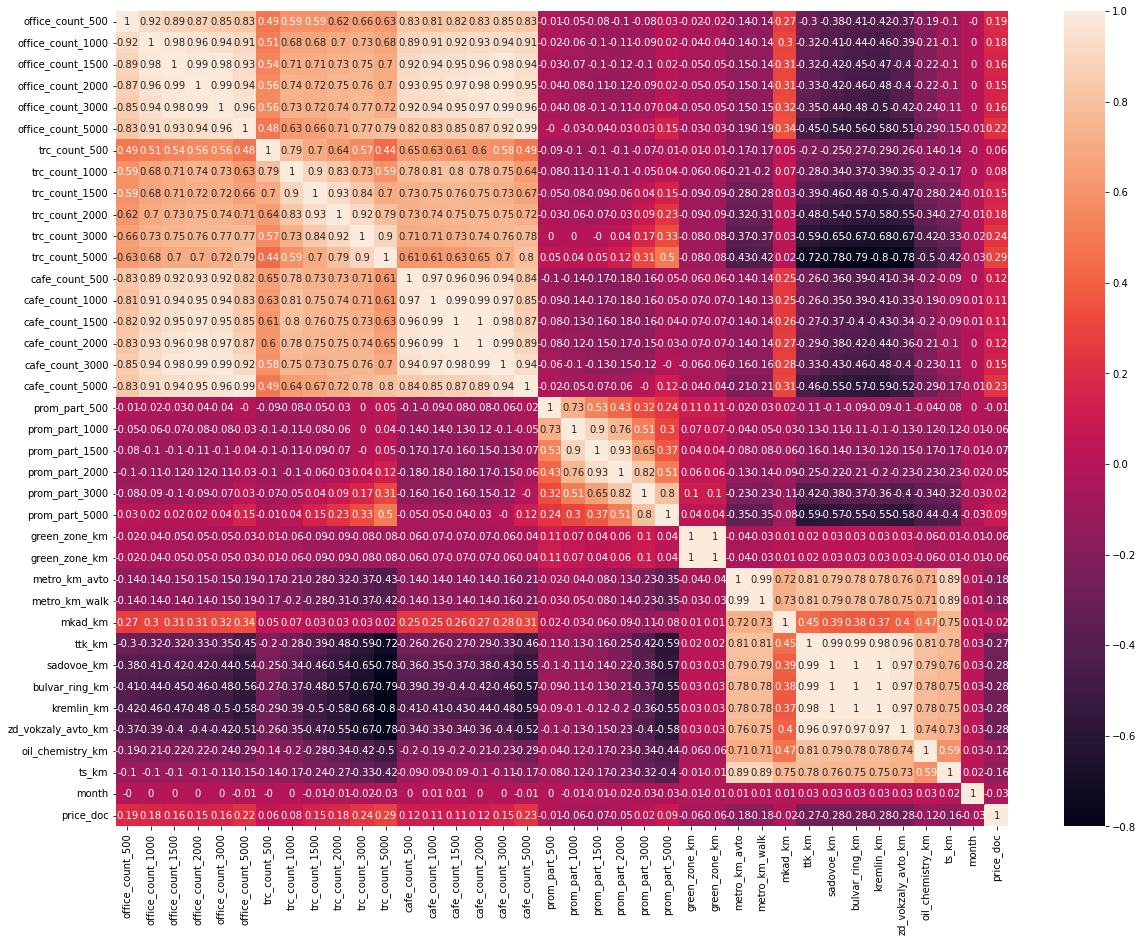

In [40]:
df2= df[["office_count_500","office_count_1000","office_count_1500","office_count_2000","office_count_3000","office_count_5000",\
                "trc_count_500","trc_count_1000","trc_count_1500","trc_count_2000","trc_count_3000","trc_count_5000",\
                "cafe_count_500","cafe_count_1000","cafe_count_1500","cafe_count_2000","cafe_count_3000","cafe_count_5000",\
                "prom_part_500","prom_part_1000","prom_part_1500","prom_part_2000","prom_part_3000", "prom_part_5000",\
                "green_zone_km","metro_km_avto","metro_km_walk","mkad_km","ttk_km","sadovoe_km","bulvar_ring_km","kremlin_km",\
                "zd_vokzaly_avto_km","oil_chemistry_km","ts_km","month","price_doc"]]
x_corr2 = df2.copy()
correlation_matrix2 = x_corr2.corr().round(2)
plt.subplots(figsize=(20,15))
sns.heatmap(data=correlation_matrix2, annot=True)

In [41]:
# из предыдущих столбцов выбираем наиболее коррелируемые к искомой "trc_count_5000","trc_count_3000","num_room","ttk_km","sadovoe_km","bulvar_ring_km","kremlin_km","zd_vokzaly_avto_km"

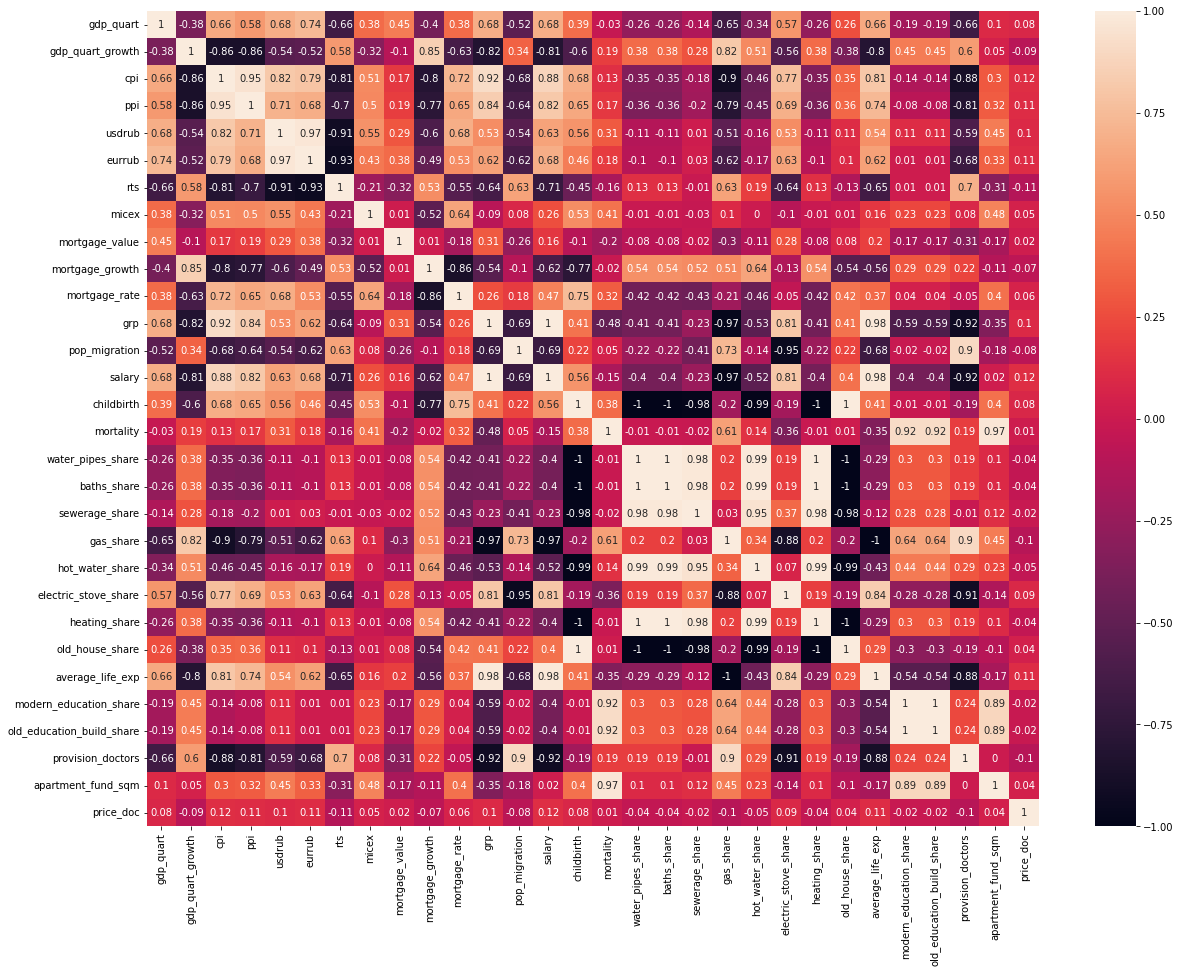

In [42]:
df3= df[["gdp_quart","gdp_quart_growth","cpi","ppi","usdrub","eurrub","rts","micex",\
           "mortgage_value","mortgage_growth","mortgage_rate","grp","pop_migration","salary","childbirth","mortality",\
          "water_pipes_share","baths_share","sewerage_share","gas_share","hot_water_share","electric_stove_share",\
           "heating_share","old_house_share","average_life_exp", "modern_education_share","old_education_build_share",\
          "provision_doctors","apartment_fund_sqm","price_doc"]]
x_corr3 = df3.copy()
correlation_matrix3 = x_corr3.corr().round(2)
plt.subplots(figsize=(20,15))
sns.heatmap(data=correlation_matrix3, annot=True)

In [43]:
# из предыдущих столбцов выбираем наиболее коррелируемые к искомой "cpi","salary","eurrub","rts"

In [44]:
# выводим таблицу корреляций для данных стоблцов

In [45]:
df4= df[["full_sq","life_sq","num_room","trc_count_5000","trc_count_3000","ttk_km","sadovoe_km",\
         "bulvar_ring_km","kremlin_km","zd_vokzaly_avto_km","cpi","salary","eurrub","rts","price_doc"]]
df4.describe()

,full_sq,life_sq,num_room,trc_count_5000,trc_count_3000,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,zd_vokzaly_avto_km,cpi,salary,eurrub,rts,price_doc
count,30471.000000,24088.000000,20899.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,3.047100e+04
mean,54.214269,34.403271,1.909804,30.131863,11.827442,11.318152,14.056721,15.023338,16.044808,17.214848,411.660490,57670.694703,48.759814,1264.247603,7.123035e+06
std,38.031487,52.285733,0.851805,23.924051,10.914428,8.066780,8.343162,8.475342,8.441964,10.300605,32.436292,5290.487057,9.412958,223.254277,4.780111e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001935,0.000355,0.001947,0.072897,0.136715,353.000000,44898.700000,38.433700,629.150000,1.000000e+05
25%,38.000000,20.000000,1.000000,6.000000,2.000000,5.339845,8.346336,9.256658,10.460471,9.992420,388.500000,55485.200000,41.593100,1119.370000,4.740002e+06
50%,49.000000,30.000000,2.000000,31.000000,11.000000,9.842632,12.748712,13.611476,14.879161,14.757627,408.300000,61208.000000,46.821000,1315.950000,6.274411e+06
75%,63.000000,43.000000,2.000000,43.000000,17.000000,15.675454,18.716620,19.945193,20.666814,24.061214,428.600000,61208.000000,50.220000,1425.990000,8.300000e+06
max,5326.000000,7478.000000,19.000000,120.000000,66.000000,66.033200,68.853047,69.984874,70.738769,91.215063,489.500000,64310.000000,84.960500,1754.810000,1.111111e+08


In [46]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30471 entries, 0 to 30470
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   full_sq             30471 non-null  int64  
 1   life_sq             24088 non-null  float64
 2   num_room            20899 non-null  float64
 3   trc_count_5000      30471 non-null  int64  
 4   trc_count_3000      30471 non-null  int64  
 5   ttk_km              30471 non-null  float64
 6   sadovoe_km          30471 non-null  float64
 7   bulvar_ring_km      30471 non-null  float64
 8   kremlin_km          30471 non-null  float64
 9   zd_vokzaly_avto_km  30471 non-null  float64
 10  cpi                 30471 non-null  float64
 11  salary              30471 non-null  float64
 12  eurrub              30471 non-null  float64
 13  rts                 30471 non-null  float64
 14  price_doc           30471 non-null  int64  
dtypes: float64(11), int64(4)
memory usage: 3.7 MB


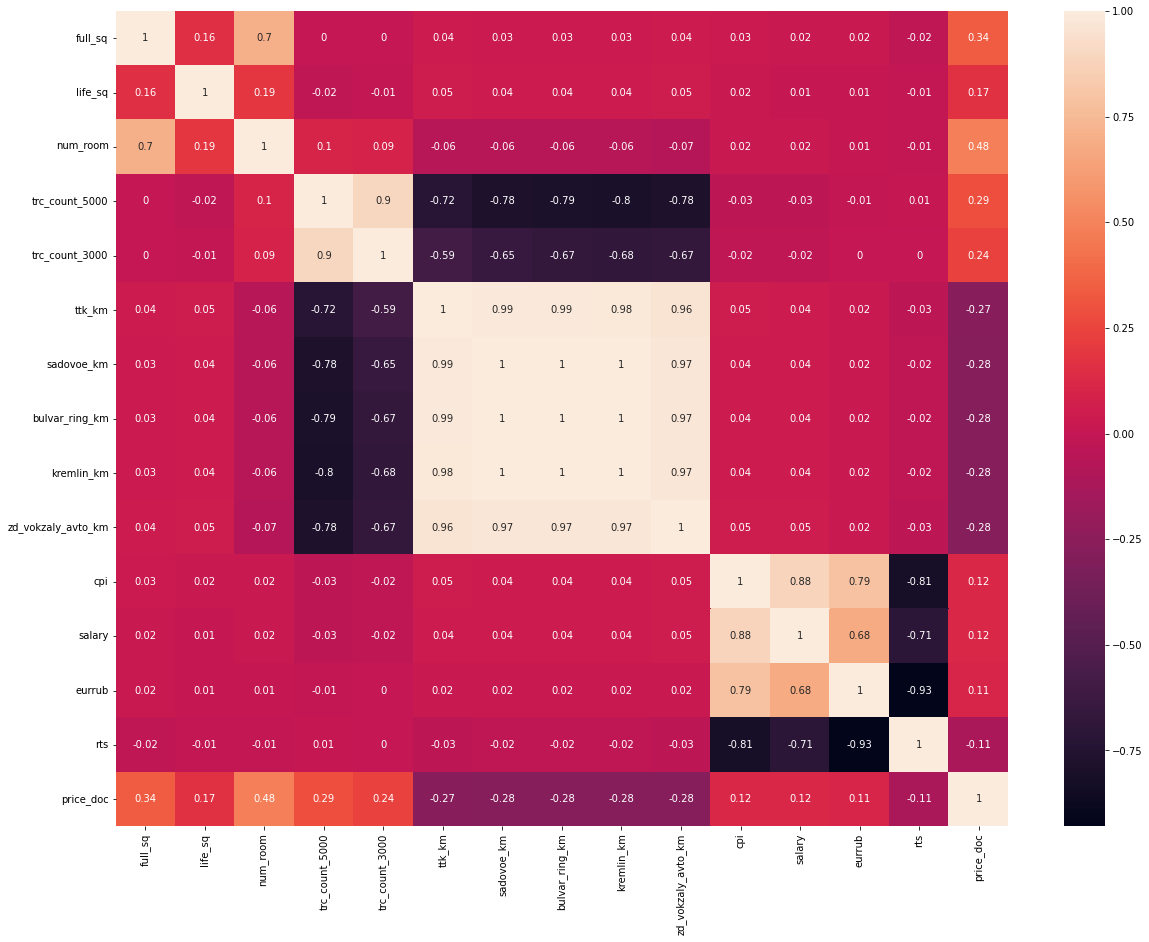

In [47]:
x_corr4 = df4.copy()
correlation_matrix4 = x_corr4.corr().round(2)
plt.subplots(figsize=(20,15))
sns.heatmap(data=correlation_matrix4, annot=True)

In [48]:
#Разделим данные на признаки "x" и целевую переменную "y"
x = x_corr4
y = x['price_doc']
x.drop('price_doc',  axis = 'columns', inplace = True)

In [49]:
# Заполняем пустоты минмальными значениями

In [50]:
x[["full_sq","life_sq"]] = x[["full_sq","life_sq"]].fillna(x[["full_sq","life_sq"]].min())
x["num_room"] = x["num_room"].fillna(x["num_room"].min())
x[["trc_count_3000","trc_count_5000"]] = x[["trc_count_3000","trc_count_5000"]].fillna(x[["trc_count_3000","trc_count_5000"]].min())
x["num_room"] = x["num_room"].fillna(x["num_room"].min())
x["ttk_km"] = x["ttk_km"].fillna(x["ttk_km"].min())
x["sadovoe_km"] = x["sadovoe_km"].fillna(x["sadovoe_km"].min())
x["bulvar_ring_km"] = x["bulvar_ring_km"].fillna(x["bulvar_ring_km"].min())
x["kremlin_km"] = x["kremlin_km"].fillna(x["kremlin_km"].min())
x["zd_vokzaly_avto_km"] = x["zd_vokzaly_avto_km"].fillna(x["zd_vokzaly_avto_km"].min())
x["cpi"] = x["cpi"].fillna(x["cpi"].min())
x["salary"] = x["salary"].fillna(x["salary"].min())
x["eurrub"] = x["eurrub"].fillna(x["eurrub"].min())

In [51]:
x.head(20)

,full_sq,life_sq,num_room,trc_count_5000,trc_count_3000,ttk_km,sadovoe_km,bulvar_ring_km,kremlin_km,zd_vokzaly_avto_km,cpi,salary,eurrub,rts
0,43,27.0,0.0,52,23,10.918587,13.100618,13.675657,15.156211,14.231961,354.0,44898.7,41.7681,1575.33
1,34,19.0,0.0,40,14,3.103996,6.444333,8.132640,8.698054,9.242586,354.0,44898.7,41.7537,1578.91
2,43,29.0,0.0,35,7,2.927487,6.963403,8.054252,9.067885,9.540544,354.0,44898.7,41.7114,1596.17
3,89,50.0,0.0,22,12,14.606501,17.457198,18.309433,19.487005,17.478380,353.2,44898.7,41.4014,1703.86
4,77,77.0,0.0,114,60,1.721834,0.046810,0.787593,2.578671,1.595898,353.2,44898.7,41.5902,1617.01
5,67,46.0,0.0,63,29,0.284868,3.519389,4.395057,5.645796,5.070197,353.2,44898.7,41.5031,1618.63
6,25,14.0,0.0,49,24,2.026623,3.940566,4.686895,6.468719,3.028547,353.2,44898.7,41.2839,1675.14
7,44,44.0,0.0,45,21,11.534146,13.713752,14.286177,15.770426,14.434462,353.2,44898.7,41.1192,1625.29
8,42,27.0,0.0,41,12,5.514868,8.290837,8.963023,10.357535,7.500715,353.2,44898.7,41.1192,1625.29
9,36,21.0,0.0,32,12,5.885973,8.955785,10.003460,10.869120,10.229145,353.2,44898.7,41.4451,1572.00


In [52]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30471 entries, 0 to 30470
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   full_sq             30471 non-null  int64  
 1   life_sq             30471 non-null  float64
 2   num_room            30471 non-null  float64
 3   trc_count_5000      30471 non-null  int64  
 4   trc_count_3000      30471 non-null  int64  
 5   ttk_km              30471 non-null  float64
 6   sadovoe_km          30471 non-null  float64
 7   bulvar_ring_km      30471 non-null  float64
 8   kremlin_km          30471 non-null  float64
 9   zd_vokzaly_avto_km  30471 non-null  float64
 10  cpi                 30471 non-null  float64
 11  salary              30471 non-null  float64
 12  eurrub              30471 non-null  float64
 13  rts                 30471 non-null  float64
dtypes: float64(11), int64(3)
memory usage: 3.5 MB


In [53]:
features = [['full_sq','num_room'], ['num_room','full_sq', 'kremlin_km'],\
            ['num_room','full_sq', 'kremlin_km','sadovoe_km','ttk_km','zd_vokzaly_avto_km'],\
            ['num_room','full_sq', 'kremlin_km','sadovoe_km','ttk_km','zd_vokzaly_avto_km','bulvar_ring_km'],\
            ['num_room','full_sq', 'kremlin_km', 'trc_count_5000'], ['cpi', 'salary'],\
            ['num_room', 'kremlin_km','sadovoe_km','ttk_km','zd_vokzaly_avto_km','bulvar_ring_km'],\
            ['full_sq', 'kremlin_km','sadovoe_km','ttk_km','zd_vokzaly_avto_km','bulvar_ring_km'],\
            ['num_room','full_sq', 'kremlin_km','sadovoe_km','ttk_km','zd_vokzaly_avto_km','bulvar_ring_km','salary'],\
            ['num_room','full_sq', 'kremlin_km','sadovoe_km','ttk_km','zd_vokzaly_avto_km','bulvar_ring_km','salary','cpi'],\
            ['num_room','full_sq', 'kremlin_km','sadovoe_km','ttk_km','zd_vokzaly_avto_km','bulvar_ring_km','cpi'],\
            ['num_room','full_sq', 'kremlin_km','salary','cpi'],\
            ['num_room','full_sq', 'kremlin_km','sadovoe_km','ttk_km','zd_vokzaly_avto_km','bulvar_ring_km','salary','cpi','eurrub'],\
            ['cpi', 'salary','eurrub'], ['full_sq'],['num_room']]

In [54]:
metrics = pd.DataFrame(columns=['Features', 'MAE train', 'MAE test', 'MSE train', 'MSE test', 'R2 train', 'R2 test'])
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

for future in features:
  x_future_test = x.loc[:, future]
  x_train, x_test, y_train, y_test = train_test_split(x_future_test, y, test_size = 0.2, random_state=5)

  transformer = Normalizer().fit(x_train.loc[:, x_train.columns])
  x_train = pd.DataFrame(transformer.transform(x_train.loc[:, x_train.columns]), index = x_train.index, columns = x_train.columns)
  x_test = pd.DataFrame(transformer.transform(x_test.loc[:, x_test.columns]), index = x_test.index, columns = x_test.columns)

  regr = LinearRegression()
  regr.fit(x_train, y_train)
  pred_train = regr.predict(x_train)
  pred_test = regr.predict(x_test)
  
  metrics = metrics.append({'Features' : future, 
                            'MAE train' : mean_absolute_error(y_train, pred_train), 
                            'MAE test' : mean_absolute_error(y_test, pred_test), 
                            'MSE train' : mean_squared_error(y_train, pred_train), 
                            'MSE test' : mean_squared_error(y_test, pred_test), 
                            'R2 train' : r2_score(y_train, pred_train), 
                            'R2 test' : r2_score(y_test, pred_test)}, ignore_index=True)

print(metrics)

                                             Features     MAE train      MAE test     MSE train      MSE test  R2 train   R2 test
0                                 [full_sq, num_room]  2.832189e+06  2.862824e+06  2.259600e+13  2.292309e+13  0.009240  0.003882
1                     [num_room, full_sq, kremlin_km]  2.285972e+06  2.311709e+06  1.679405e+13  1.695531e+13  0.263637  0.263211
2   [num_room, full_sq, kremlin_km, sadovoe_km, tt...  2.230611e+06  2.250049e+06  1.632733e+13  1.643177e+13  0.284101  0.285961
3   [num_room, full_sq, kremlin_km, sadovoe_km, tt...  2.253867e+06  2.279102e+06  1.572172e+13  1.587259e+13  0.310655  0.310260
4     [num_room, full_sq, kremlin_km, trc_count_5000]  2.392753e+06  2.411592e+06  1.645976e+13  1.645883e+13  0.278294  0.284785
5                                       [cpi, salary]  2.883521e+06  2.899193e+06  2.272560e+13  2.290957e+13  0.003558  0.004469
6   [num_room, kremlin_km, sadovoe_km, ttk_km, zd_...  2.497492e+06  2.508011e+06  1.81730

In [55]:
# Средняя абсолютная ошибка (MAE) большая, как и средний квадрат ошибки (MSE).
# что-то определенно можно сказать только по коэффициенту детерминации (r-квадрат)
# самые лушие метрики при выборе ['num_room','full_sq', 'kremlin_km','sadovoe_km','ttk_km','zd_vokzaly_avto_km','bulvar_ring_km','cpi']  --среди макроэкономических показателей большую роль играет ВВП

In [56]:
#Попробуем оставить только значимые признаки для feature engineering

In [57]:
features1 = ['num_room','full_sq', 'kremlin_km','sadovoe_km','ttk_km','zd_vokzaly_avto_km','bulvar_ring_km','cpi']
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

x_future_test = x.loc[:, features1]
x_train, x_test, y_train, y_test = train_test_split(x_future_test, y, test_size = 0.2, random_state=5)

transformer = Normalizer().fit(x_train.loc[:, x_train.columns])
x_train = pd.DataFrame(transformer.transform(x_train.loc[:, x_train.columns]), index = x_train.index, columns = x_train.columns)
x_test = pd.DataFrame(transformer.transform(x_test.loc[:, x_test.columns]), index = x_test.index, columns = x_test.columns)


In [58]:
# вручную уберем cpi
x_train_manual = x_train.copy()
x_test_manual = x_test.copy()
x_train_manual.drop(labels = ["cpi"], axis = 1, inplace = True)
x_test_manual.drop(labels = ["cpi"], axis = 1, inplace = True)
x_test_manual.head()

,num_room,full_sq,kremlin_km,sadovoe_km,ttk_km,zd_vokzaly_avto_km,bulvar_ring_km
30345,0.002029,0.077096,0.040337,0.036212,0.030696,0.048962,0.038588
7699,0.000000,0.390372,0.026421,0.021967,0.015523,0.027351,0.024638
22856,0.004628,0.118009,0.027061,0.022275,0.017256,0.020634,0.023661
1176,0.000000,0.167277,0.008207,0.002565,0.003366,0.006710,0.004137
17151,0.002397,0.074303,0.031650,0.025648,0.020175,0.028092,0.027420


In [58]:
#для SelectFromModel + ExtraTreesClassifier не хватило ОЗУ

In [ ]:
#x_train_select = x_train.copy()
#x_test_select = x_test.copy()

#estimator = ExtraTreesClassifier(n_estimators = 100)
#featureSelection = SelectFromModel(estimator)
#featureSelection.fit(x_train_select, y_train)
#x_train_select = pd.DataFrame(featureSelection.transform(x_train_select), columns = x_train_select.columns.values[featureSelection.get_support()]) 
#x_test_select = pd.DataFrame(featureSelection.transform(x_test_select), columns = x_test_select.columns.values[featureSelection.get_support()]) 
#x_train_select.head()

In [59]:
#Теперь попробуем применить SelectKBest + chi2
x_train_select2 = x_train.copy()
x_test_select2 = x_test.copy()

featureSelection = SelectKBest(chi2, k=6) 
featureSelection.fit(x_train_select2.iloc[:,:-2], y_train)
x_train_select2 = pd.DataFrame(featureSelection.transform(x_train_select2.iloc[:,:-2]), columns = x_train_select2.iloc[:,:-2].columns.values[featureSelection.get_support()]) 
x_test_select2 = pd.DataFrame(featureSelection.transform(x_test_select2.iloc[:,:-2]), columns = x_test_select2.iloc[:,:-2].columns.values[featureSelection.get_support()]) 
x_train_select2.head()

,num_room,full_sq,kremlin_km,sadovoe_km,ttk_km,zd_vokzaly_avto_km
0,0.002053,0.071838,0.017513,0.012945,0.006404,0.025584
1,0.000000,0.163434,0.066401,0.061258,0.053138,0.075419
2,0.000000,0.118612,0.017426,0.011937,0.002229,0.016560
3,0.000000,0.133253,0.037934,0.032271,0.023874,0.039443
4,0.002467,0.069082,0.024169,0.018939,0.010127,0.025555


In [60]:
# поскольку будем использовать для обучения логистическую регрессию, то приведем признаки к единому масштабу
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
x_train_manual_new = sc1.fit_transform(x_train_manual)
x_train_manual_new = pd.DataFrame(x_train_manual_new, columns = x_train_manual.columns)
x_test_manual_new = sc1.transform(x_test_manual)
x_test_manual_new = pd.DataFrame(x_test_manual_new, columns = x_test_manual.columns)

sc3 = StandardScaler()
x_train_select2_new = sc3.fit_transform(x_train_select2)
x_train_select2_new = pd.DataFrame(x_train_select2_new, columns = x_train_select2.columns)
x_test_select2_new = sc3.transform(x_test_select2)
x_test_select2_new = pd.DataFrame(x_test_select2_new, columns = x_test_select2.columns)

In [64]:
# обучим модель №1
logisticRegression = LogisticRegression(random_state=30)
logisticRegression.fit(x_train_manual_new, y_train)
print("Train Accuracy: ", logisticRegression.score(x_train_manual_new, y_train))
print("Test Accuracy: ", logisticRegression.score(x_test_manual_new, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Train Accuracy:  0.030070561207745324
Test Accuracy:  0.026579163248564398


In [63]:
# обучим модель №2
logisticRegression = LogisticRegression(random_state=42)
logisticRegression.fit(x_train_select2_new, y_train)
print("Train Accuracy: ", logisticRegression.score(x_train_select2_new, y_train))
print("Test Accuracy: ", logisticRegression.score(x_test_select2_new, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Train Accuracy:  0.030029537249753855
Test Accuracy:  0.026579163248564398


In [65]:
# обучим модель №3
randomForestClassifier = RandomForestClassifier(n_estimators = 1000, max_depth = 2, max_features='log2', random_state=3)
randomForestClassifier.fit(x_train, y_train)
print("Train Accuracy: ", randomForestClassifier.score(x_train, y_train))
print("Test Accuracy: ", randomForestClassifier.score(x_test, y_test))

Train Accuracy:  0.02822448309812931
Test Accuracy:  0.02575881870385562


In [66]:
x_train.head()

,num_room,full_sq,kremlin_km,sadovoe_km,ttk_km,zd_vokzaly_avto_km,bulvar_ring_km,cpi
29402,0.002053,0.071838,0.017513,0.012945,0.006404,0.025584,0.015991,0.996699
4465,0.000000,0.163434,0.066401,0.061258,0.053138,0.075419,0.064577,0.975933
5860,0.000000,0.118612,0.017426,0.011937,0.002229,0.016560,0.014205,0.992474
8677,0.000000,0.133253,0.037934,0.032271,0.023874,0.039443,0.036490,0.988082
12725,0.002467,0.069082,0.024169,0.018939,0.010127,0.025555,0.021935,0.996515


In [67]:
# сгенерим взаимодествия между столбцами
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(interaction_only=True,include_bias = False)
x_train_2 = poly.fit_transform(x_train)
x_train_2 = pd.DataFrame(x_train_2, columns = poly.get_feature_names(x_train.columns))
x_test_2 = poly.fit_transform(x_test)
x_test_2 = pd.DataFrame(x_test_2, columns = poly.get_feature_names(x_test.columns))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [68]:
x_train_2.head()

,num_room,full_sq,kremlin_km,sadovoe_km,ttk_km,zd_vokzaly_avto_km,bulvar_ring_km,cpi,num_room full_sq,num_room kremlin_km,num_room sadovoe_km,num_room ttk_km,num_room zd_vokzaly_avto_km,num_room bulvar_ring_km,num_room cpi,full_sq kremlin_km,full_sq sadovoe_km,full_sq ttk_km,full_sq zd_vokzaly_avto_km,full_sq bulvar_ring_km,full_sq cpi,kremlin_km sadovoe_km,kremlin_km ttk_km,kremlin_km zd_vokzaly_avto_km,kremlin_km bulvar_ring_km,kremlin_km cpi,sadovoe_km ttk_km,sadovoe_km zd_vokzaly_avto_km,sadovoe_km bulvar_ring_km,sadovoe_km cpi,ttk_km zd_vokzaly_avto_km,ttk_km bulvar_ring_km,ttk_km cpi,zd_vokzaly_avto_km bulvar_ring_km,zd_vokzaly_avto_km cpi,bulvar_ring_km cpi
0,0.002053,0.071838,0.017513,0.012945,0.006404,0.025584,0.015991,0.996699,0.000147,0.000036,0.000027,0.000013,0.000053,0.000033,0.002046,0.001258,0.000930,0.000460,0.001838,0.001149,0.071601,0.000227,0.000112,0.000448,0.000280,0.017455,0.000083,0.000331,0.000207,0.012902,0.000164,0.000102,0.006382,0.000409,0.025500,0.015938
1,0.000000,0.163434,0.066401,0.061258,0.053138,0.075419,0.064577,0.975933,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010852,0.010012,0.008685,0.012326,0.010554,0.159500,0.004068,0.003528,0.005008,0.004288,0.064803,0.003255,0.004620,0.003956,0.059784,0.004008,0.003432,0.051859,0.004870,0.073604,0.063023
2,0.000000,0.118612,0.017426,0.011937,0.002229,0.016560,0.014205,0.992474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002067,0.001416,0.000264,0.001964,0.001685,0.117719,0.000208,0.000039,0.000289,0.000248,0.017295,0.000027,0.000198,0.000170,0.011847,0.000037,0.000032,0.002212,0.000235,0.016436,0.014098
3,0.000000,0.133253,0.037934,0.032271,0.023874,0.039443,0.036490,0.988082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005055,0.004300,0.003181,0.005256,0.004862,0.131665,0.001224,0.000906,0.001496,0.001384,0.037482,0.000770,0.001273,0.001178,0.031886,0.000942,0.000871,0.023589,0.001439,0.038973,0.036055
4,0.002467,0.069082,0.024169,0.018939,0.010127,0.025555,0.021935,0.996515,0.000170,0.000060,0.000047,0.000025,0.000063,0.000054,0.002459,0.001670,0.001308,0.000700,0.001765,0.001515,0.068842,0.000458,0.000245,0.000618,0.000530,0.024085,0.000192,0.000484,0.000415,0.018873,0.000259,0.000222,0.010092,0.000561,0.025466,0.021858


In [69]:
# обучим модель №4
randomForestClassifier2 = RandomForestClassifier(n_estimators = 1000, max_depth = 2, max_features='log2', random_state=0)
randomForestClassifier2.fit(x_train_2, y_train)
print("Train Accuracy: ", randomForestClassifier2.score(x_train_2, y_train))
print("Test Accuracy: ", randomForestClassifier2.score(x_test_2, y_test))

Train Accuracy:  0.02859369872005251
Test Accuracy:  0.025922887612797374


In [70]:
# выведем рейтинг важности признаков с учетом их взаимодействий
feature_scores = pd.Series(randomForestClassifier2.feature_importances_, index=x_train_2.columns).sort_values(ascending=False)
feature_scores.head(30)

cpi                                  0.135637
full_sq                              0.103515
full_sq cpi                          0.094496
ttk_km                               0.079602
ttk_km cpi                           0.055866
sadovoe_km ttk_km                    0.052521
full_sq zd_vokzaly_avto_km           0.044377
sadovoe_km                           0.039793
kremlin_km ttk_km                    0.038039
sadovoe_km cpi                       0.034946
ttk_km bulvar_ring_km                0.028245
full_sq sadovoe_km                   0.025046
ttk_km zd_vokzaly_avto_km            0.024150
num_room                             0.022451
kremlin_km sadovoe_km                0.022424
num_room cpi                         0.022336
num_room full_sq                     0.021927
full_sq bulvar_ring_km               0.017457
full_sq kremlin_km                   0.015654
sadovoe_km bulvar_ring_km            0.014640
full_sq ttk_km                       0.013884
kremlin_km                        